Mean vector trend = 208.6, plunge 40.0
Mean resultant length = 0.963


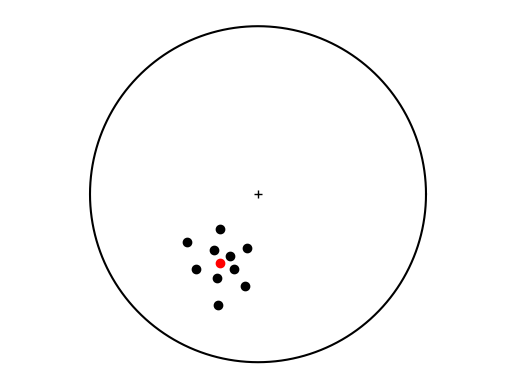

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Import functions st_coord_line and calc_mv
import sys, os
sys.path.append(os.path.abspath("../functions"))
from st_coord_line import st_coord_line
from calc_mv import calc_mv

# Arrays T and P contain the trend (T) 
# and plunge (P) of the 10 poles
T = np.radians([206, 220, 204, 198, 200, 188, 192, 
                228, 236, 218])
P = np.radians([32, 30, 46, 40, 20, 32, 54, 56, 36, 44])

# Compute the mean vector and print orientation
# and mean resultant length
trd, plg, rave, conc, d99, d95 = calc_mv(T,P)
rad = 180/np.pi
print(f"Mean vector trend = {trd*rad:.1f}, plunge {plg*rad:.1f}")
print(f"Mean resultant length = {rave:.3f}")

# Make a figure
fig, ax = plt.subplots()

# Plot the primitive of the stereonet
r = 1; # unit radius
th = np.radians(np.arange(0,361,1))
x = r * np.cos(th)
y = r * np.sin(th)
ax.plot(x,y,"k")
# Plot center of circle
ax.plot(0,0,"k+")
# Make axes equal and remove them
ax.axis("equal")
ax.axis("off")

# Plot the poles as black points
# on an equal angle stereonet
npoles = len(T)
eq_angle = np.zeros((npoles, 2))
for i in range(npoles):
    # Equal angle coordinates
    eq_angle[i,0], eq_angle[i,1] = st_coord_line(T[i],P[i],0)

ax.plot(eq_angle[:,0],eq_angle[:,1],"ko")

# Plot the mean vector as a red point
mvx, mvy = st_coord_line(trd,plg,0)
ax.plot(mvx,mvy,"ro")

# Show the plot
plt.show()